In [0]:
from tensorflow import keras

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data()

# Display basic info abt training set and test set
print('Training data: ',train_data.shape)
print('Training labels: ',train_labels.shape,train_labels)

# Count the number of 0 and 1 in train_labels
n_zero=(train_labels==0).sum()
n_one=(train_labels==1).sum()
print('Number of 0 and 1 in train_labels: {}, {}'.format (n_zero,n_one))

print('\nTest data: ',test_data.shape)
print('Test labels: ',test_labels.shape,test_labels)

# Count the number of 0 and 1 in test_labels
n_zero_test=(test_labels==0).sum()
n_one_test=(test_labels==1).sum()
print('Number of 0 and 1 in train_labels: {}, {}'.format (n_zero_test,n_one_test))

Training data:  (25000,)
Training labels:  (25000,) [1 0 0 ... 0 1 0]
Number of 0 and 1 in train_labels: 12500, 12500

Test data:  (25000,)
Test labels:  (25000,) [0 1 1 ... 0 0 0]
Number of 0 and 1 in train_labels: 12500, 12500


In [0]:
print('The first row of training data (length: {}): \n'.format(len(train_data[0])),train_data[0])
print('\nThe second row of training data (length: {}): \n'.format(len(train_data[1])),train_data[1])

lens=[len(train_data[i]) for i in range(len(train_data))]
max_length=max(lens)
min_length=min(lens)
print('\nThe min and max length in train_data: {}, {}'.format(min_length,max_length))


The first row of training data (length: 218): 
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 1

In [0]:
# Get the dict of word2index which map the word to int (key=word and value= index)
word2index=keras.datasets.imdb.get_word_index()


# By default, the first 4 indixes of the word2index are reserved 
# So we need to shift the index of each word by 3 to add 4 special words
word2index=dict([(key,value+3) for (key,value) in word2index.items()])
word2index["<PAD>"] = 0
word2index["<START>"] = 1
word2index["<UNK>"] = 2  # unknown
word2index["<UNUSED>"] = 3

print("The length of word2index: " , len(word2index))
print("The word2index: \n" , word2index)

# Get the dict of index2word which map the int to word (key=index and value= word)
index2word=dict([(value,key) for (key,value) in word2index.items()])

# Display some data of index2word
print('\nThe index2word: ')
print('Sorted index: ', sorted(index2word.keys()))
for i in range(10):
  print(index2word[i])

The length of word2index:  88588
The word2index: 
 {'fawn': 34704, 'tsukino': 52009, 'nunnery': 52010, 'sonja': 16819, 'vani': 63954, 'woods': 1411, 'spiders': 16118, 'hanging': 2348, 'woody': 2292, 'trawling': 52011, "hold's": 52012, 'comically': 11310, 'localized': 40833, 'disobeying': 30571, "'royale": 52013, "harpo's": 40834, 'canet': 52014, 'aileen': 19316, 'acurately': 52015, "diplomat's": 52016, 'rickman': 25245, 'arranged': 6749, 'rumbustious': 52017, 'familiarness': 52018, "spider'": 52019, 'hahahah': 68807, "wood'": 52020, 'transvestism': 40836, "hangin'": 34705, 'bringing': 2341, 'seamier': 40837, 'wooded': 34706, 'bravora': 52021, 'grueling': 16820, 'wooden': 1639, 'wednesday': 16821, "'prix": 52022, 'altagracia': 34707, 'circuitry': 52023, 'crotch': 11588, 'busybody': 57769, "tart'n'tangy": 52024, 'burgade': 14132, 'thrace': 52026, "tom's": 11041, 'snuggles': 52028, 'francesco': 29117, 'complainers': 52030, 'templarios': 52128, '272': 40838, '273': 52031, 'zaniacs': 52133,

In [0]:
# Function to convert a sequence of int to a sequence of words
def getText(int_seq):
  text=' '.join([index2word.get(i) for i in int_seq])
  return text

# Print text of the first train_data
print('The first review: ')
print(getText(train_data[0]))
print('The label: ',train_labels[0])
      
print('\nThe second review: ')
print(getText(train_data[1]))
print('The label: ',train_labels[1])

The first review: 
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children 

In [0]:
# Add PAD to train_data and test_data
train_data=keras.preprocessing.sequence.pad_sequences(train_data,value=word2index['<PAD>'],padding='post',maxlen=max_length)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,value=word2index['<PAD>'],padding='post',maxlen=max_length)

print('The first row of training data (length: {}): \n'.format(len(train_data[0])),train_data[0])
print('\nThe second row of training data (length: {}): \n'.format(len(train_data[1])),train_data[1])

The first row of training data (length: 2494): 
 [ 1 14 22 ...  0  0  0]

The second row of training data (length: 2494): 
 [   1  194 1153 ...    0    0    0]


In [0]:
# Define the dimension of embedding
vocab_size=len(word2index)
embedding_dim=50

n_filter1=128
size_filter1=5

n_filter2=256
size_filter2=3

# Build a model using keras.Sequential()
model=keras.Sequential()

# Add an Embedding layer
model.add(keras.layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_length))

# Add the first Convolutional layer
model.add(keras.layers.Conv1D(filters=n_filter1,kernel_size=size_filter1,activation='relu',input_shape=(None,max_length,embedding_dim)))

# Add a Max Pooling layer
model.add(keras.layers.MaxPool1D(pool_size=2))

# Add the seoond Convolutional layer
model.add(keras.layers.Conv1D(filters=n_filter2,kernel_size=size_filter2,activation='relu'))

# Add a GlobalAvgPool1D layer
model.add(keras.layers.GlobalAvgPool1D())

# Add  the output layer
model.add(keras.layers.Dense(1,activation='sigmoid'))

# Display model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 2494, 50)          4429400   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 2490, 128)         32128     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1245, 128)         0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1243, 256)         98560     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 4,560,345
Trainable params: 4,560,345
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Mount to Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Change the working directory
import os
os.chdir('/content/drive/My Drive/Deep learning with Colab/Saved Models')

In [0]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
 
# Stop training if 'val_loss' stops improving for over 10 epochs
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,verbose=1)

# Save the best model to .h5 file
best_model=keras.callbacks.ModelCheckpoint(filepath='cnn_best_model.h5',monitor='val_acc',save_best_only=True,verbose=1)

# Start training
model_history=model.fit(train_data, train_labels, batch_size=512,validation_split=0.3, epochs=50,callbacks=[early_stopping,best_model])

Train on 17500 samples, validate on 7500 samples
Epoch 1/50
17408/17500 [============================>.] - ETA: 0s - loss: 0.0142 - acc: 0.9956
Epoch 00001: val_acc improved from -inf to 0.89147, saving model to cnn_best_model.h5
17500/17500 [==============================] - 25s 1ms/sample - loss: 0.0141 - acc: 0.9956 - val_loss: 0.7129 - val_acc: 0.8915
Epoch 2/50
17408/17500 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9998
Epoch 00002: val_acc improved from 0.89147 to 0.89547, saving model to cnn_best_model.h5
17500/17500 [==============================] - 25s 1ms/sample - loss: 0.0015 - acc: 0.9998 - val_loss: 0.6738 - val_acc: 0.8955
Epoch 3/50
17408/17500 [============================>.] - ETA: 0s - loss: 2.9381e-04 - acc: 1.0000
Epoch 00003: val_acc improved from 0.89547 to 0.89587, saving model to cnn_best_model.h5
17500/17500 [==============================] - 25s 1ms/sample - loss: 2.9669e-04 - acc: 1.0000 - val_loss: 0.6819 - val_acc: 0.8959
Epoch 4/50

In [0]:
# Load the best model
model=keras.models.load_model(filepath='cnn_best_model.h5')

# Evaluate the model using the test set
print(model.evaluate(test_data,test_labels))

25000/25000 [==============================] - 15s 590us/sample - loss: 0.8299 - acc: 0.8715
[0.8298892680311203, 0.87152]


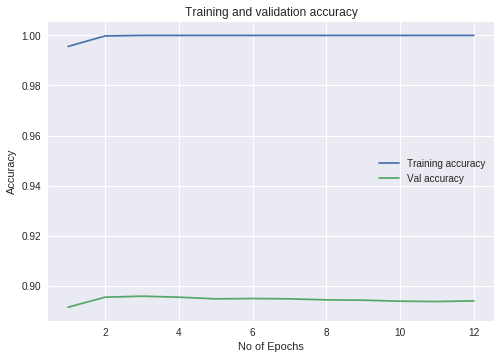

In [0]:
import matplotlib.pyplot as plt

# Get training accuracy and validation accuracy from model history
history_dict = model_history.history
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

# Diplay a chart of training accuracy and validation accuracy
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)

plt.title('Training and validation accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Val accuracy'], loc='center right')

plt.show()